In [3]:
from __future__ import print_function
from __future__ import division
from __future__ import unicode_literals

import numpy as np
import deepchem as dc
from deepchem.molnet import load_delaney
from deepchem.models import GraphConvModel
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


#Setting up model

In [397]:
##input malaria file
# delaney_tasks = ['Desired_property']
delaney_tasks = ['CL mouse GEOM_MEAN']

# featurizer = dc.feat.ConvMolFeaturizer()
featurizer = dc.feat.RDKitDescriptors()

input_dataset = "/Users/KHatti001/OneDrive - University of Dundee/project1_data/Series4_firstSet_trimmed_subset.csv"

loader = dc.data.CSVLoader(tasks=delaney_tasks, smiles_field="SMILES", featurizer=featurizer)
dataset = loader.featurize(input_dataset, shard_size=8192)

# Options of transformers
# dc.trans.LogTransformer
# dc.trans.ClippingTransformer
# dc.trans.NormalizationTransformer
# dc.trans.AtomicNormalizationTransformer
# dc.trans.BalancingTransformer
# dc.trans.CDFTransformer
# dc.trans.PowerTransformer
# dc.trans.CoulombRandomizationTransformer
# dc.trans.CoulombBinarizationTransformer


# Initialize transformers
transformers = [
  dc.trans.NormalizationTransformer(
      transform_y=True, dataset=dataset)
]

# transformers = [
#   dc.trans.BalancingTransformer(dataset=dataset)
# ]

print("About to transform data")
for transformer in transformers:
    dataset = transformer.transform(dataset)

# splitters = {
#   'index': dc.splits.IndexSplitter(),
#   'random': dc.splits.RandomSplitter(),
#   'scaffold': dc.splits.ScaffoldSplitter()
# }
splitter = dc.splits.ScaffoldSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset, 
                                                                            frac_train = 0.8, 
                                                                             frac_valid  = 0.1, 
                                                                             frac_test  = 0.1
                                                                            )


Loading raw samples now.
shard_size: 8192
About to start loading CSV from /Users/KHatti001/OneDrive - University of Dundee/project1_data/Series4_firstSet_trimmed_subset.csv
Loading shard 1 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 0 took 1.424 s
TIMING: dataset construction took 1.443 s
Loading dataset from disk.
About to transform data
TIMING: dataset construction took 0.008 s
Loading dataset from disk.
TIMING: dataset construction took 0.008 s
Loading dataset from disk.
TIMING: dataset construction took 0.007 s
Loading dataset from disk.
TIMING: dataset construction took 0.007 s
Loading dataset from disk.


In [390]:
# Load Delaney dataset
# delaney_tasks, delaney_datasets, transformers = load_delaney(
#     featurizer='GraphConv', split='index')
# train_dataset, valid_dataset, test_dataset = dataset

# Fit models
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score, np.mean)

# Do setup required for tf/keras models
# Number of features on conv-mols
n_feat = 80
# Batch size of models
batch_size = 128
model = GraphConvModel(
    len(delaney_tasks), 
#     graph_conv_layers=[128,128],
#     dense_layer_size=256,
    batch_size=batch_size, mode='regression')


In [398]:
print("training data length", len(train_dataset))
print("validation data length", len(valid_dataset))

training data length 167
validation data length 21


##Train model

In [399]:
# Fit trained model
def run_and_store_results(nb_epoch_value):
    scoring_function_used = "mean-pearson_r2_score"
#     scoring_function_used = "r2_score"
    model.fit(train_dataset, nb_epoch=nb_epoch_value)

#     print("Evaluating model")
    train_scores =  model.evaluate(train_dataset, [metric], transformers)
    valid_scores = model.evaluate(valid_dataset, [metric], transformers)
    print("printing some value", train_scores[scoring_function_used])
    return train_scores[scoring_function_used],valid_scores[scoring_function_used]

#     print("Train scores")
#     print(train_scores)

#     print("Validation scores")
#     print(valid_scores)

# model.restore()

valid_scores_list=[]
train_scores_list=[]
epoch_inputs_list=[]
# for nb_epoch_value in range(0,50,15):
for nb_epoch_value in [100,300]:
    print (nb_epoch_value)
    train_scores,valid_scores = run_and_store_results(nb_epoch_value)
    epoch_inputs_list.append(nb_epoch_value)
    valid_scores_list.append(valid_scores)
    train_scores_list.append(train_scores)
    
print(epoch_inputs_list)
print(valid_scores_list)
print(train_scores_list)

    
# dir(train_scores)
# print(dic["C"])
# print(valid_scores["mean-pearson_r2_score"])

100


AttributeError: 'numpy.ndarray' object has no attribute 'atom_features'

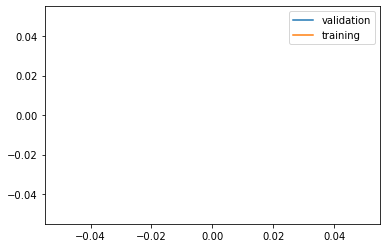

In [400]:
plt.plot(epoch_inputs_list, valid_scores_list, label="validation")
plt.plot(epoch_inputs_list, train_scores_list, label="training")
plt.legend()

In [ ]:
model.save()
model = model.load_from_dir('models')
valid_scores = model.evaluate(valid_dataset, [metric], transformers)

In [50]:
jinga=[]
jinga.append(10)

In [51]:
jinga

[10]